# DP0.2 Notebook 16 Galaxy Photometry

<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px" alt="Rubin Observatory logo, a graphical representation of turning stars into data.">
<br>
Contact author(s): <i>Christina Williams</i> <br>
Last verified to run: <i>2024-01-18</i> <br>
LSST Science Pipelines version: Weekly <i>2024_24</i> <br>
Container Size: <i>medium</i> <br>
Targeted learning level: <i>beginner</i> <br>

In [1]:
#%load_ext pycodestyle_magic
#%flake8_on
#import logging
#logging.getLogger("flake8").setLevel(logging.FATAL)

**Description:** Explore the available measurements of galaxy photometry produced by the LSST pipelines and their applications.

**Skills:** Basic understanding of photometric measurement methods typically used to characterize galaxies.

**LSST Data Products:** objectTable

**Packages:** No new LSST packages are introduced here. The notebook will make use of the TAP service from the `lsst.rsp` package.

**Credit:**
"This notebook benefitted from earlier exploration of simulated data and notebook development by Melissa Graham and Dan Taranu. _E.g., "Originally developed by" or "Based on notebooks developed by" and then people's names, including journal article or software release citations if appropriate._
Please consider acknowledging them if this notebook is used for the preparation of journal articles, software releases, or other notebooks.

**Get Support:**
Find DP0-related documentation and resources at <a href="https://dp0.lsst.io">dp0.lsst.io</a>.
Questions are welcome as new topics in the 
<a href="https://community.lsst.org/c/support/dp0">Support - Data Preview 0 Category</a> 
of the Rubin Community Forum. 
Rubin staff will respond to all questions posted there.

## 1. Introduction

This notebook will teach the user about the automated photometry measurements that are measured on the deepCoadd images and appear in the Object Catalog as part of the LSST pipelines data products. The focus will be on galaxies (and thus is distinct from the demonstrations in Tutorial Notebook 12a/b about the PSF photometry (CHECK/LINK). 


### 1.1 Types of photometry measurements that exist in the Object Table

Schema for the object catalog for DP0.2: https://dm.lsst.org/sdm_schemas/browser/dp02.html#Object

Numerous photometry measurements are produced by the LSST Pipelines. Two types of photometry are there: The first are total fluxes are those that integrate the total light coming from objects, corrected for loss due to the blurring effects of PSF or seeing, including "Composite Model" (`cModel`) fluxes and "Kron Fluxes". The second category characterize the relative brightness of objects for specific regions of objects (i.e. are not corrected to be total fluxes) but can be useful for measuring accurate light profiles or accurate colors.

### 1.1.1 Total fluxes

#### Kron fluxes

A decent summary of Kron fluxes <a href="https://ned.ipac.caltech.edu/level5/March05/Graham/Graham2_6.html">in the NED documentation</a>.

```
<f>_kronFlux      : Flux from Kron Flux algorithm. Measured on <f> g-band.
<f>_kronFluxErr   : Uncertainty of <f>_kronFlux.
<f>_kronFlux_flag : Failure flag for <f>_kronFlux.
```

The Kron radius, `<f>_kronRad`, is also available.


#### Composite Model (CModel) fluxes

Similar in nature to those measured for SDSS: 
https://www.sdss3.org/dr8/algorithms/magnitudes.php#cmodel

In short, it is the linear combination of the best fit exponential and de Vaucouleurs profiles.

```
<f>_cModelFlux    :	Flux from the final cmodel fit. Forced on <f>-band.
<f>_cModelFluxErr : Uncertainty of <f>_cModelFlux
<f>_cModel_flag   : Failure flag for <f>_cModelFlux
```

Fluxes fit to the individual model components.

```
<f>_bdFluxB    : Flux from the de Vaucouleurs fit. Measured on <f>-band.
<f>_bdFluxD    : Flux from the exponential fit. Measured on <f>-band.
<f>_bdFluxBErr : Uncertainty of <f>_bdFluxB
<f>_bdFluxDErr : Uncertainty of <f>_bdFluxD
```

The fit sizes are also available (half-light radii, ellipse axes).

### 1.1.2 Regional fluxes

#### Aperture fluxes
This contains the enclosed flux inside a given aperture (these are raw fluxes, meaning, they are not corrected to total fluxes using an aperture correction that accounts for the flux falling outside the aperture using the PSF). Fixed aperture diameter size in pixels.

```
<f>_ap<pix>Flux     : Flux within <pix>-pixel aperture. Forced on <f>-band.
<f>_ap<pix>FluxErr  : Uncertainty of <f>_ap<pix>Flux.
<f>_ap<pix>FluxFlag : Failure flag for <f>_ap<pix>Flux.
```

For DP0.2, the apertures are 3, 6, 9, 12, 17, 25, 35, 50, and 70 pixels.

In the column name, apertures are `03`, `06`, `09`, `12`, and so on.

#### GaaP fluxes

These are the Gaussian-aperture-and-PSF flux from <a href="https://ui.adsabs.harvard.edu/abs/2008A%26A...482.1053K/abstract">Kuijken et al. 2008</a>. The main goal of this method is to measure accurate colors while accounting for the different spatial resolution between filters. This is sometimes done by convolving all images to the largest PSF, but this process is computationally very time consuming for large images. It is not a measure of total flux in a filter. For photometric redshifts, since accurate colors are important, it is the GaaP fluxes that should be used. Several apertures are available (TBD: what is optimal aperture based on?)

**Optimal**

```
<f>_gaapOptimalFlux    : GaaP flux with optimal aperture after multiplying the seeing by 1.15. Forced on <f>-band.
<f>_gaapOptimalFluxErr : Uncertainty of <f>_gaapOptimalFlux.
```

**PSF**

```
<f>_gaapPsfFlux    : GaaP flux with PSF aperture after multiplying the seeing by 1.15. Forced on <f>-band.
<f>_gaapPsfFluxErr : Uncertainty of <f>_gaapPsfFlux.
```

**Aperture**

```
<f>_gaap<ap>Flux    : GaaP flux with <ap> aperture after multiplying the seeing by 1.15. Forced on <f>-band.
<f>_gaap<ap>FluxErr : Uncertainty of <f>_gaap<ap>Flux.
```

Where the apertures are 0.5, 0.7, 1.0, 1.5, 2.5, and 3.0.
In the column name `<ap>` appears as `0p5`, `0p7`, etc.


#### PSF fluxes

Fluxes derived using the model point-spread function (PSF) of the image. Since PSF fluxes are designed for unresolved sources (not the majority of galaxies) this notebook will not explore science applications for this type of photometry. Interested users can find more information in the PSF Tutorial notebooks <a href="https://dp0-2.lsst.io/_static/nb_html/DP02_12a_PSF_Data_Products.html">12a</a> and <a href="https://dp0-2.lsst.io/_static/nb_html/DP02_12b_PSF_Science_Demo.html">12b</a>.

```
<f>_psfFlux      : Flux derived from linear least-squares fit of PSF model. Forced on <f>-band.
<f>_psfFluxErr   : Uncertainty of <f>_psfFlux.
<f>_psfFlux_flag : Failure flag for <f>_psfFlux.

```


### 1.2 Import packages


`numpy` is a fundamental package for scientific computing with arrays in Python
(<a href="https://numpy.org">numpy.org</a>).

`matplotlib` is a comprehensive library for creating static, animated, and
interactive visualizations in Python 
(<a href="https://matplotlib.org/">matplotlib.org</a>; 
<a href="https://matplotlib.org/stable/gallery/index.html">matplotlib gallery</a>).

From the `lsst` package, modules for accessing the TAP service, the butler, and image display functions are imported (<a href="https://pipelines.lsst.io/">pipelines.lsst.io</a>).

In [2]:
import matplotlib.pyplot as plt
#from astropy.wcs import WCS
#from astropy.visualization import make_lupton_rgb
from astropy import units as u
from astropy.coordinates import SkyCoord
import gc
import numpy as np
import sys

#import lsst.afw.display as afwDisplay
#from lsst.afw.image import MultibandExposure
#from lsst.daf.butler import Butler
from lsst.rsp import get_tap_service
#import lsst.geom as geom

from scipy import stats#.binned_statistic
from scipy.stats import sigmaclip


# stuff for cutout
import time
import numpy as np
import uuid
import os
import glob
import math
import pandas
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image as dimg

import lsst.geom as geom
import lsst.resources
import lsst.afw.display as afwDisplay
from lsst.afw.image import Exposure, ExposureF
from lsst.pipe.tasks.registerImage import RegisterConfig, RegisterTask
from lsst.rsp import get_tap_service
from lsst.rsp.utils import get_access_token
from lsst.afw.fits import MemFileManager

import pyvo
from pyvo.dal.adhoc import DatalinkResults, SodaQuery

from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
from astropy.io import fits
from astropy.wcs import WCS

from photutils.aperture import SkyCircularAperture


### 1.3 Define functions and parameters

_TBD if we can remove this_

_It is OK to rename the subsection to be more specific to the notebook, and/or to use sub-sub-sections like "1.2.1 Define global cosmological parameter values" or "1.2.2 Define a function to make an image cutout"._

_It is OK to remove this sub-section if it is not being used._

In [3]:
plt.style.use('tableau-colorblind10')
#afwDisplay.setDefaultBackend('matplotlib')
afwDisplay.setDefaultBackend('matplotlib')

params = {'axes.labelsize': 18,
          'font.size': 18,
          'legend.fontsize': 12,
          'xtick.major.width': 2,
          'xtick.minor.width': 1,
          'xtick.major.size': 10,
          'xtick.minor.size': 4,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 2,
          'axes.linewidth': 2,
          'axes.labelweight': 2,
          'axes.titleweight': 2,
          'ytick.major.width': 2,
          'ytick.minor.width': 1,
          'ytick.major.size': 10,
          'ytick.minor.size': 4,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [6, 6],
          'figure.facecolor': 'White'
          }
plt.style.use('tableau-colorblind10')

plt.rcParams.update(params)

In [4]:
def plotImage(exposure: ExposureF):
    """Plot and image using lsst.awf.image package

   Parameters
    ----------
    exposure : `ExposureF`
        the image to plot from file in LSST awf image exposure class format

   Returns
    -------
    image for notebook display
    """

    fig, ax = plt.subplots()
    display = afwDisplay.Display(frame=fig)
    display.scale('asinh', 'zscale')
    display.mtv(exposure.image)
    plt.show()

In [5]:


def make_image_cutout(tap_service, ra, dec, dataId, cutout_size=0.01,
                      imtype=None, filename=None):
    """Wrapper function to generate a cutout using the cutout tool

   Parameters
    ----------
    tap_service : an instance of the TAP service
    ra, dec : 'float'
        the ra and dec of the cutout center
    dataId : 'dict'
        the dataId of the image to make a cutout from. The format
        must correspond to that provided for parameter 'imtype'
    cutout_size : 'float', optional
        edge length in degrees of the cutout
    imtype : 'string', optional
        string containing the type of LSST image to generate
        a cutout of (e.g. deepCoadd, calexp). If imtype=None,
        the function will assume a deepCoadd.
    filename : 'string', optional
        filename of the resulting cutout (which has fits format)

   Returns
    -------
    sodaCutout : 'string'
        filename of the cutout in fits format (including
        full directory path; for now by default it is saved
        in /home/dp02_13a_temp/
    """

    spherePoint = geom.SpherePoint(ra*geom.degrees, dec*geom.degrees)

    if imtype == 'calexp':

        query = "SELECT access_format, access_url, dataproduct_subtype, " + \
            "lsst_visit, lsst_detector, lsst_band, s_ra, s_dec " + \
            "FROM ivoa.ObsCore WHERE dataproduct_type = 'image' " + \
            "AND obs_collection = 'LSST.DP02' " + \
            "AND dataproduct_subtype = 'lsst.calexp' " + \
            "AND lsst_visit = " + str(dataId["visit"]) + " " + \
            "AND lsst_detector = " + str(dataId["detector"])
        results = tap_service.search(query)

    else:
        # Find the tract and patch that contain this point
        tract = dataId["tract"]
        patch = dataId["patch"]

        # add optional default band if it is not contained in the dataId
        band = dataId["band"]

        query = "SELECT access_format, access_url, dataproduct_subtype, " + \
            "lsst_patch, lsst_tract, lsst_band, s_ra, s_dec " + \
            "FROM ivoa.ObsCore WHERE dataproduct_type = 'image' " + \
            "AND obs_collection = 'LSST.DP02' " + \
            "AND dataproduct_subtype = 'lsst.deepCoadd_calexp' " + \
            "AND lsst_tract = " + str(tract) + " " + \
            "AND lsst_patch = " + str(patch) + " " + \
            "AND lsst_band = " + "'" + str(band) + "' "
        results = tap_service.search(query)

    # Get datalink
    dataLinkUrl = results[0].getdataurl()
    auth_session = service._session
    dl = DatalinkResults.from_result_url(dataLinkUrl,
                                         session=auth_session)

    # from_resource: creates a instance from
    # a number of records and a Datalink Resource.
    sq = SodaQuery.from_resource(dl,
                                 dl.get_adhocservice_by_id("cutout-sync"),
                                 session=auth_session)

    sq.circle = (spherePoint.getRa().asDegrees() * u.deg,
                 spherePoint.getDec().asDegrees() * u.deg,
                 cutout_size * u.deg)

    if filename:
        sodaCutout = os.path.join(os.getenv('HOME'), 'dp02_13a_temp/'+filename)
    else:
        sodaCutout = os.path.join(os.getenv('HOME'), 'dp02_13a_temp/soda-cutout.fits')

    with open(sodaCutout, 'bw') as f:
        f.write(sq.execute_stream().read())

    return sodaCutout


## 2. Integrated photometry of galaxies using the LSST pipeline

This section will explore the total, integrated photometry measurements, and provide some guidance for which are optimal for certain science applications using galaxies. 


### 2.1 Initialize the TAP service

In [6]:
service = get_tap_service("tap")

### 2.2 Object table photometry measurements

First see what is available in the object catalog by querying the tap_schema columns, and printing all the parameters available related to "Flux" measured in the i-band (as an example). The return shows also errors and flags associated with the photometric measurements outlined in section 1.1. 

In [7]:
query = "SELECT column_name, datatype, description, unit " \
        "FROM tap_schema.columns " \
        "WHERE table_name = 'dp02_dc2_catalogs.Object'"

results = service.search(query).to_table()

In [8]:
search_string = 'Flux'
band = 'i_'
for cname in results['column_name']:
    if (cname.find(search_string) > -1) and (cname.find(band) > -1):
        print(cname)

i_ap03Flux
i_ap03Flux_flag
i_ap03FluxErr
i_ap06Flux
i_ap06Flux_flag
i_ap06FluxErr
i_ap09Flux
i_ap09Flux_flag
i_ap09FluxErr
i_ap12Flux
i_ap12Flux_flag
i_ap12FluxErr
i_ap17Flux
i_ap17Flux_flag
i_ap17FluxErr
i_ap25Flux
i_ap25Flux_flag
i_ap25FluxErr
i_ap35Flux
i_ap35Flux_flag
i_ap35FluxErr
i_ap50Flux
i_ap50Flux_flag
i_ap50FluxErr
i_ap70Flux
i_ap70Flux_flag
i_ap70FluxErr
i_apFlux_flag
i_apFlux_flag_apertureTruncated
i_apFlux_flag_sincCoeffsTruncated
i_bdFluxB
i_bdFluxBErr
i_bdFluxD
i_bdFluxDErr
i_calibFlux
i_calibFlux_flag
i_calibFlux_flag_apertureTruncated
i_calibFlux_flag_sincCoeffsTruncated
i_calibFluxErr
i_cModelFlux
i_cModelFlux_inner
i_cModelFluxErr
i_free_cModelFlux
i_free_cModelFlux_flag
i_free_cModelFlux_inner
i_free_cModelFluxErr
i_free_psfFlux
i_free_psfFlux_flag
i_free_psfFluxErr
i_gaap0p5Flux
i_gaap0p5Flux_flag_bigPsf
i_gaap0p5FluxErr
i_gaap0p7Flux
i_gaap0p7Flux_flag_bigPsf
i_gaap0p7FluxErr
i_gaap1p0Flux
i_gaap1p0Flux_flag_bigPsf
i_gaap1p0FluxErr
i_gaap1p5Flux
i_gaap1p5Flux_fla

In [9]:
query = "SELECT obj.coord_ra, obj.coord_dec, obj.detect_fromBlend, obj.detect_isIsolated, obj.i_blendedness_flag, obj.i_blendedness, obj.i_extendedness, "\
        "obj.i_kronFlux, obj.i_kronFluxErr, obj.i_kronRad, obj.i_kronFlux_flag, obj.i_cModelFlux, obj.i_gaapOptimalFlux " + \
        "FROM dp02_dc2_catalogs.Object AS obj  "\
        "WHERE (obj.detect_isPrimary = 1) AND (obj.i_kronFlux/obj.i_kronFluxErr > 10) AND (obj.i_extendedness = 1) AND "\
        "CONTAINS(POINT('ICRS', obj.coord_ra, obj.coord_dec), CIRCLE('ICRS', 62.0, -37.0, 0.20)) = 1 "


In [10]:
job = service.submit_job(query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)

Job phase is COMPLETED


Print the results of the search query.

In [11]:
results = job.fetch_result()
print(len(results))
tab = results.to_table()
tab

13699


coord_ra,coord_dec,detect_fromBlend,detect_isIsolated,i_blendedness_flag,i_blendedness,i_extendedness,i_kronFlux,i_kronFluxErr,i_kronRad,i_kronFlux_flag,i_cModelFlux,i_gaapOptimalFlux
deg,deg,,,,,,nJy,nJy,,,nJy,nJy
float64,float64,bool,bool,bool,float64,float64,float64,float64,float32,bool,float64,float64
62.0067968,-36.9020816,True,False,False,0.0049983,1.0,10922.7229643,85.9962967,5.04477,False,12304.6727035,6460.0525305
62.0037681,-36.9024377,True,False,False,-7e-06,1.0,1182.0265062,53.1780048,3.20611,False,1181.785426,910.9258521
62.0085719,-36.9024176,True,False,False,0.0726756,1.0,1266.9036015,82.3860448,4.84711,False,1372.3096197,756.726213
62.005342,-36.903529,True,False,False,0.0069281,1.0,909.234224,75.7142907,4.51312,False,886.0944003,607.4636703
62.0045637,-36.902735,True,False,False,-0.0154942,1.0,604.4002275,51.3669159,3.07866,False,616.7654328,507.5349915
62.0423854,-36.9036671,True,False,False,-0.0023311,1.0,13512.3935231,71.4485953,4.36286,False,13351.4881963,8748.3736732
62.1962173,-36.9037948,True,False,False,0.041724,1.0,661.3043447,53.564723,3.22397,False,656.9081063,539.9425927
62.1956541,-36.9046139,True,False,False,-0.0236929,1.0,802.0931369,67.3860517,4.07341,False,789.6351291,551.6344401


### 2.4 Exploring the input vs output photometry

This section will explore 3 photometric measurements that are relevant for galaxies: cModel, Kron and GaaP (as defined in Section 2.1). 

First, store the AB magnitudes to go with the fluxes extracted from the objectTable.

In [12]:
#truth_mag =  -2.50 * np.log10(tab['flux_i']) + 31.4
i_kronRad = tab['i_kronRad']
cmodel_mag = -2.50 * np.log10(tab['i_cModelFlux']) + 31.4
kron_mag = -2.50 * np.log10(tab['i_kronFlux']) + 31.4
gaap_mag = -2.50 * np.log10(tab['i_gaapOptimalFlux']) + 31.4


/tmp/ipykernel_6782/4090871.py:3: RuntimeWarning: divide by zero encountered in log10
  cmodel_mag = -2.50 * np.log10(tab['i_cModelFlux']) + 31.4


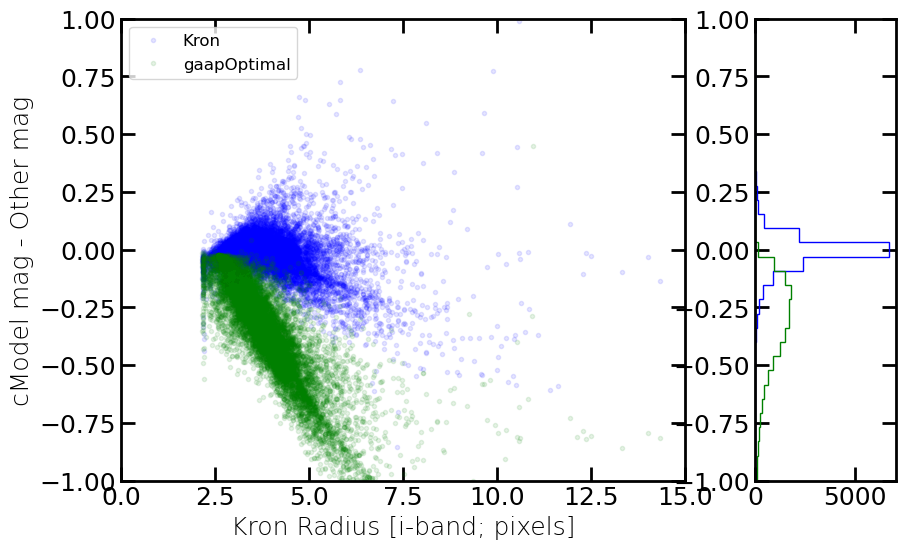

In [13]:
fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, width_ratios=[0.8, 0.2], figsize=(10, 6))
ylims = [-1.2,1.2]

ax.plot(i_kronRad, (cmodel_mag-kron_mag),'.',alpha=.1,label='Kron',color='blue')
ax.plot(i_kronRad, (cmodel_mag-gaap_mag),'.',alpha=.1, label='gaapOptimal',color='green')
#ax.plot(truth_mag, (cmodel_mag-truth_mag),'.',alpha=.1,label='cModel',color='r')

ax2.hist((cmodel_mag-kron_mag),edgecolor='blue',orientation="horizontal", bins=np.linspace(ylims[0], ylims[1], 40),align='mid',histtype="step",stacked=True,fill=False)
ax2.hist((cmodel_mag-gaap_mag),edgecolor='green',orientation="horizontal", bins=np.linspace(ylims[0], ylims[1], 40),align='mid',histtype="step",stacked=True,fill=False)
ax2.set_ylim([-1,1])
#ax.axhline(0,linestyle='--')
ax.set_xlabel('Kron Radius [i-band; pixels]')
ax.set_ylabel('cModel mag - Other mag')
ax.set_ylim([-1,1])
ax.set_xlim([0,15])
ax.legend()


In [14]:
query = "SELECT column_name, datatype, description, unit " \
        "FROM tap_schema.columns " \
        "WHERE table_name = 'dp02_dc2_catalogs.Object'"

schema_results = service.search(query).to_table()
search_string = 'kron'
band = 'i_'
for cname in schema_results['column_name']:
    if (cname.find(search_string) > -1) and (cname.find(band) > -1):
        print(cname)

i_kronFlux
i_kronFlux_flag
i_kronFlux_flag_bad_radius
i_kronFlux_flag_bad_shape
i_kronFlux_flag_bad_shape_no_psf
i_kronFlux_flag_edge
i_kronFlux_flag_no_fallback_radius
i_kronFlux_flag_no_minimum_radius
i_kronFlux_flag_small_radius
i_kronFlux_flag_used_minimum_radius
i_kronFlux_flag_used_psf_radius
i_kronFluxErr
i_kronRad


In [15]:
sys.exit()

SystemExit: 

/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


 OLD STUFF BELOW: (see notes from Melissa 1/14 at the end for the plan)

### 2.3 Compare (total) simulated photometry measured with the LSST pipelines to their input values

The following cells will query the truth tables to get the input fluxes in the DP0.2 simulated objects, matched to those measured from the simulated images using the LSST pipelines. This comparison provides a sense of how good the various photometry measurement methods are by comparing input flux to measured flux. This provides some insight into what regimes they may perform well vs poorly.

The below cells query the truth values for i-band mag, measured i-band mag values from the catalog, and a number of flags that are relevant to the quality of the galaxy photometric measurements. Specifically, request `fromBlend`, `detect_isIsolated`, and `i_blendedness` which will indicate how much blending may have occurred, how large the galaxies are, to help provide insight in cases of catastrophic outliers.

Further, to ensure good measurements, restrict to objects which are detected at S/N > 5 and where `detect_isPrimary` is true, to ensure unique objects are returned (for more information on the use of the `detect_isPrimary` flag, see <a href="https://dp0-2.lsst.io/_static/nb_html/DP02_10_Deblender_Data_Products.html">Tutorial Notebook 10</a> about deblender data products. Also, set the condition that `i_extendedness` = 1 in order to return a population of galaxies (i.e. remove stars as point sources). To expedite the search we will limit to a 0.1 degree region on the sky.

In [ ]:
query = "SELECT mt.id_truth_type, mt.match_objectId, ts.ra, ts.dec, ts.truth_type, ts.flux_i, ts.redshift, "\
        "obj.coord_ra, obj.coord_dec, obj.detect_fromBlend, obj.detect_isIsolated, obj.i_blendedness_flag, obj.i_blendedness, obj.i_extendedness, "\
        "obj.i_kronFlux, obj.i_kronFluxErr, obj.i_kronRad, obj.i_kronFlux_flag, obj.i_cModelFlux, obj.i_gaapOptimalFlux " + \
        "FROM dp02_dc2_catalogs.MatchesTruth AS mt "\
        "JOIN dp02_dc2_catalogs.TruthSummary AS ts ON mt.id_truth_type = ts.id_truth_type "\
        "JOIN dp02_dc2_catalogs.Object AS obj ON mt.match_objectId = obj.objectId "\
        "WHERE (obj.detect_isPrimary = 1) AND (obj.i_kronFlux/obj.i_kronFluxErr > 10) AND (obj.i_extendedness = 1) AND "\
        "CONTAINS(POINT('ICRS', obj.coord_ra, obj.coord_dec), CIRCLE('ICRS', 62.0, -37.0, 0.20)) = 1 "

In [ ]:
job = service.submit_job(query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)

Print the results of the search query.

In [ ]:
results = job.fetch_result()
print(len(results))
tab = results.to_table()
tab

### 2.4 Exploring the input vs output photometry

This section will explore 3 photometric measurements that are relevant for galaxies: cModel, Kron and GaaP (as defined in Section 2.1). 

First, store the AB magnitudes to go with the fluxes extracted from the objectTable.

In [ ]:
truth_mag =  -2.50 * np.log10(tab['flux_i']) + 31.4

cmodel_mag = -2.50 * np.log10(tab['i_cModelFlux']) + 31.4
kron_mag = -2.50 * np.log10(tab['i_kronFlux']) + 31.4
gaap_mag = -2.50 * np.log10(tab['i_gaapOptimalFlux']) + 31.4


The next cell will compare the percent difference between the three different photometric measurements with the input (truth). Additionally a running median is calculated to help interpret the typical accuracy of the different methods. The median has the best overall percent accuracy for cModel, which is has < 3.5% median deviation for all magnitudes < 24 ABmag. Additionally, the Gaussian and PSF photometry is highly inaccurate, as explained in Section 1.1 this is not meant to measure the total flux of galaxies, but rather to measure accurate colors using a sub-region of each galaxy. Deviation from truth for this measurement is thus expected.

In [ ]:
fig, ax = plt.subplots()

ax.plot(truth_mag, (tab['i_cModelFlux']-tab['flux_i'])/tab['flux_i'] * 100,'.',alpha=.1,label='cModel',color='r')
ax.plot(truth_mag, (tab['i_kronFlux']-tab['flux_i'])/tab['flux_i'] * 100,'.',alpha=.1,label='Kron',color='blue')
ax.plot(truth_mag, (tab['i_gaapOptimalFlux']-tab['flux_i'])/tab['flux_i'] * 100,'.',alpha=.1, label='gaapOptimal',color='green')

x = truth_mag
y = (tab['i_cModelFlux']-tab['flux_i'])/tab['flux_i'] *100
bins=np.arange(16,27,1)
bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y, statistic='median', bins=bins)
binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
plt.plot(binctr, bin_means, color='red', lw=2, label='cModel bin median',zorder=10)
for i in range(len(bin_means)):
    print(binctr[i],bin_means[i],'cModel')

y = (tab['i_kronFlux']-tab['flux_i'])/tab['flux_i'] *100
bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y, statistic='median', bins=bins)
binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
plt.plot(binctr, bin_means, color='blue', lw=2, label='kron bin median',zorder=10)
for i in range(len(bin_means)):
    print(binctr[i],bin_means[i],'kron')

y = (tab['i_gaapOptimalFlux']-tab['flux_i'])/tab['flux_i'] * 100
bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y, statistic='median', bins=bins)
binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
plt.plot(binctr, bin_means, color='green', lw=2, label='GaaP Optimal bin median',zorder=10)#,color='green')

ax.axhline(0,linestyle='--')
ax.set_xlabel('True i-band Magnitude')
ax.set_ylabel('Flux Percent Accuracy (F$_{obs}$ - F$_{true}$) / F$_{true}$ x 100%')
ax.set_ylim([-100,100])
ax.set_xlim([14,27])
plt.legend()


Below, take a closer look at the differences in AB magnitude and how the overall distributions compare. While the systematic offset of GaaP is clear, the medians of Kron and cModel both compare well. These two plots indicate that there is excellent agreement between the cModel measurements and the input, at the level of < 0.03 magnitude at ABmag of < 25. Kron is also adequate overall, although at intermediate magnitudes (ABmag ~ 18-22) exhibits a slight underestimate of flux (overestimate in magnitude of order 0.1-0.2).  

Note that the input light profiles of simulated galaxies in DP0.2 are sersic profiles; thus it is perhaps not unexpected that modeling the light as sersic profiles by the LSST pipelines to produce cModel fluxes would perform the best.

In [ ]:
fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, width_ratios=[0.8, 0.2], figsize=(10, 6))
ylims = [-1.2,1.2]

ax.plot(truth_mag, (kron_mag-truth_mag),'.',alpha=.1,label='Kron',color='blue')
ax.plot(truth_mag, (gaap_mag-truth_mag),'.',alpha=.1, label='gaapOptimal',color='green')
ax.plot(truth_mag, (cmodel_mag-truth_mag),'.',alpha=.1,label='cModel',color='r')

ax2.hist((kron_mag-truth_mag),edgecolor='blue',orientation="horizontal", bins=np.linspace(ylims[0], ylims[1], 40),align='mid',histtype="step",stacked=True,fill=False)
ax2.hist((gaap_mag-truth_mag),edgecolor='green',orientation="horizontal", bins=np.linspace(ylims[0], ylims[1], 40),align='mid',histtype="step",stacked=True,fill=False)
ax2.hist((cmodel_mag-truth_mag),edgecolor='red',orientation="horizontal", bins=np.linspace(ylims[0], ylims[1], 40),align='mid',histtype="step",stacked=True,fill=False)
ax2.axhline(0,linestyle='--')

x = truth_mag
y = (cmodel_mag-truth_mag)

bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y, statistic='median', bins=bins)
binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
ax.plot(binctr, bin_means, color='red', lw=2, label='cModel bin median',zorder=10)
for i in range(len(bin_means)):
    print(binctr[i],bin_means[i],'cModel')

    
y = (kron_mag-truth_mag)
bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y, statistic='median', bins=bins)
binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
ax.plot(binctr, bin_means, color='blue', lw=2, label='kron bin median',zorder=10)
for i in range(len(bin_means)):
    print(binctr[i],bin_means[i],'kron')

y = (gaap_mag-truth_mag)
bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y, statistic='median', bins=bins)
binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
ax.plot(binctr, bin_means, color='green', lw=2, label='GaaP Optimal bin median',zorder=10)#,color='green')

ax.axhline(0,linestyle='--')
ax.set_xlabel('True i-band Magnitude')
ax.set_ylabel('Magnitude difference (M$_{obs}$ - M$_{true}$)')
ax.set_xlim([14,27])
ax.set_ylim(ylims)
ax.legend()


The next cells will explore and compare the Kron magnitudes to truth under various circumstances. 2 basic paramters are set: extendedness = 1 means the source is a galaxy; kronFlag = 0 identifies galaxies for which there were no problems flagged in the Kron flux measurement. 

Test whether the following blending parameters indicate that blending contributes to the inaccurate measurement of the photometry:

1) detect_fromBlend = 1 means some deblending happened prior to flux measurement. This is responsible for some under-estimated magnitude (over-estimated flux) perhaps because neighbors were not removed at the bright end?

2) The increased scatter at faint magnitudes is due to increased fraction of flux contaminated by neighbors i_blendedness: (1 - child_flux/parent_flux)
   
3) detect_isIsolated = 1 means no deblending and the galaxy has no blended neighbors. The upturn at bright mags is not there among isolated galaxies

4) Not sure i understand the tail to negative flux difference (i.e. underestimated flux) at bright mags

In [ ]:
# here add a second set of panels to try to understand the small bias at bright end of kron (is it kron radius-dependent? since its not deblending dependent?

fig,(ax, ax2) = plt.subplots(1, 2,figsize=(12,5))

whgood = np.where((tab['i_kronFlux_flag'] == 0) & ( tab['detect_fromBlend'] == 1))[0]

# color scale by blendedness, or by kron radius to see dependence
cmap = tab['i_blendedness'][whgood] #only saw things blended with 1 neighbor is this acutally boolean?
vmax = 0.2
colmaplabel='Fraction of flux contaminated by neighbors'
cmap = tab['i_kronRad'][whgood]
vmax = 12
colmaplabel='Kron Radius [pixels]'

im = ax.scatter(truth_mag[whgood],(kron_mag[whgood]-truth_mag[whgood]),c=cmap, marker='.', alpha=.5,vmin=0,vmax=vmax,label='fromBlend')

ax.axhline(0,linestyle='--')
ax.set_title('Kron Photometry')
ax.set_xlabel('truth AB Magnitude [i-band]')
ax.set_ylabel('Mag Percent Accuracy (M$_{obs}$ - M$_{true}$) ')
ax.set_xlim([16,26])
ax.set_ylim([-1,1])
ax.legend()

whgood = np.where((tab['i_kronFlux_flag'] == 0) & (tab['i_extendedness'] == 1) & (tab['detect_isIsolated'] == 1) )[0]

# color scale by blendedness, or by kron radius to see dependence
cmap = tab['i_blendedness'][whgood]
vmax = 0.2
colmaplabel='Fraction of flux contaminated by neighbors'
cmap = tab['i_kronRad'][whgood]
vmax = 12
colmaplabel='Kron Radius [pixels]'

ax2.scatter(truth_mag[whgood],(kron_mag[whgood]-truth_mag[whgood]),c=cmap, marker='.', alpha=.5,vmin=0,vmax=vmax,label='isIsolated')
print(len(whgood))
ax2.set_xlabel('truth AB Magnitude [i-band]')
ax2.set_ylabel('Magnitude offset (M$_{obs}$ - M$_{true}$) ')
ax2.set_ylim([-1,1])
ax2.set_xlim([16,26])
ax2.legend()
ax2.axhline(0,linestyle='--')
ax2.set_title('Kron Photometry')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax,label=colmaplabel)


The above plots show that blending and contamination of flux by neighbors can result in inaccurate flux among the strong outliers, but does not cause the systematic overestimate in magnitude by Kron measurements at intermediate magnitudes. However, it is also the case that nearly none of these overestimated sources are isolated (they are blended with neibors). Large galaxy radius does increase with brightness but otherwise does not seem to give rise to the offset. (TBD: otherwise perhaps its the case that kron is not a good measure of multi-component light profiles, and the sum of 2 sersic models does a better job? Not sure how to test that. Andreon et al. 2002 says "the 2MASS isophotal mag misses some 0.1 mag with respect the Kron–like mag listed in the 2MASS database, which in turn misses about 0.15 mag with respect the true Kron mag (because computed on a too small object region), which in turn misses 5 to 10% of the total flux.)."

In [ ]:
whgood = np.where((tab['i_kronFlux_flag'] == 0) & ( tab['detect_fromBlend'] == 1))[0]

whtest = np.where((truth_mag[whgood] < 20) & 
                  ((kron_mag[whgood]-truth_mag[whgood]) > 0.15) & 
                  ((kron_mag[whgood]-truth_mag[whgood]) < 0.25))[0]

print(whtest)
for i in range(2):
    ra = results['ra'][whgood][whtest][i]
    dec = results['dec'][whgood][whtest][i]
    coord = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    radius = .1 * u.deg

    spherePoint = lsst.geom.SpherePoint(ra*geom.degrees, dec*geom.degrees)

    query = "SELECT lsst_patch, lsst_tract, s_region, " + \
            "access_format, access_url, dataproduct_subtype " + \
            "FROM ivoa.ObsCore " + \
            "WHERE dataproduct_type = 'image' " + \
            "AND obs_collection = 'LSST.DP02' " + \
            "AND dataproduct_subtype = 'lsst.deepCoadd_calexp' " + \
            "AND lsst_band = 'i' " + \
            "AND CONTAINS(POINT('ICRS', " + str(coord.ra.value) + \
            ", " + str(coord.dec.value) + "), " + \
            "s_region) = 1"

    job = service.submit_job(query)
    job.run()
    job.wait(phases=['COMPLETED', 'ERROR'])
    print('Job phase is', job.phase)
    assert job.phase == 'COMPLETED'
    results2 = job.fetch_result()
    results2.to_table()

    tract = results2['lsst_tract'][0]
    patch = results2['lsst_patch'][0]

    dataId = {'band': 'i', 'tract': tract,
              'patch': patch}

    print(dataId, ra, dec, patch, tract)
    imtype = 'deepCoadd'
    sodaCutout = make_image_cutout(service, ra, dec, dataId=dataId,
                         imtype=imtype, cutout_size=0.005)
    plotImage(ExposureF(sodaCutout))

sys.exit()

In [ ]:
# the following plots are identical, consider a different comparison that is informative
fig,(ax, ax2) = plt.subplots(1, 2,figsize=(12,5))

whgood = np.where((tab['i_kronFlux_flag'] == 0) & ( tab['detect_fromBlend'] == 1))[0]

cmap = tab['i_blendedness'][whgood] #only saw things blended with 1 neighbor is this acutally boolean?
vmax = 0.2
colmaplabel='Fraction of flux contaminated by neighbors'

#cmap = tab['i_kronRad'][whgood]
#vmax = 20
#colmaplabel='Kron Radius [pixels]'

#ax.scatter(truth_mag,(cmodel_mag-truth_mag)/truth_mag,color='k', marker='.', alpha=.5)#,vmin=0,vmax=20)
im = ax.scatter(truth_mag[whgood],(cmodel_mag[whgood]-truth_mag[whgood]),c=cmap, marker='.', alpha=.5,vmin=0,vmax=vmax,label='fromBlend')


ax.set_xlabel('truth AB Magnitude [i-band]')
ax.set_ylabel('Mag Fractional Accuracy (M$_{obs}$ - M$_{true}$) ')
ax.set_ylim([-1,1])
ax.set_xlim([16,26])
ax.axhline(0,linestyle='--')
ax.set_title('cModel Photometry')
ax.legend()
#cmap = tab['i_kronRad'][whgood] #tab['i_blendedness'][whgood] # #tab['i_blendedness'][whgood] #
whgood = np.where((tab['i_kronFlux_flag'] == 0) & (tab['i_extendedness'] == 1) & (tab['detect_isIsolated'] == 1) )[0]
cmap = tab['i_blendedness'][whgood]

#ax2.scatter(truth_mag,(cmodel_mag-truth_mag),color='k', marker='.', alpha=.5)#,vmin=0,vmax=20)
ax2.scatter(truth_mag[whgood],(cmodel_mag[whgood]-truth_mag[whgood]),c=cmap, marker='.', alpha=.5,vmin=0,vmax=vmax,label='isIsolated')
ax2.set_xlabel('truth AB Magnitude [i-band]')
#ax2.set_ylabel('Mag Accuracy (M$_{obs}$ - M$_{true}$) /  M$_{true}$')
#ax2.set_ylim([-1.5,1.5])
ax2.set_ylim([-1,1])
ax2.set_xlim([16,26])
ax2.axhline(0,linestyle='--')
print(len(whgood))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax,label=colmaplabel)

ax2.set_title('cModel Photometry')
ax2.legend()

### 2.5 Integrated photometry for high-redshift galaxies

This section compares the photometry measurements for both low redshift and high redshift galaxies to see if one performs better for larger or smaller galaxies. In both cases it seems that while `kron` and `cModel` are both adequate, like the previous section, on average `cModel` has slightly better performance, in particular at bright magnitudes.

In [ ]:

zlim = 0.5
whz = np.where(results['redshift'] < zlim)[0]
whighz = np.where(results['redshift'] >= zlim)[0]
print(len(results['redshift']),len(whz),len(whighz))

fig,(ax, ax2) = plt.subplots(1, 2,figsize=(10,5))

ax.axhline(0,linestyle='--')

ax.plot(truth_mag[whz], (kron_mag[whz]-truth_mag[whz]),'.',alpha=.1,label='Kron',color='blue')
#ax.plot(truth_mag[whz], (gaap_mag[whz]-truth_mag[whz]),'.',alpha=.1, label='gaapOptimal',color='green')
ax.plot(truth_mag[whz], (cmodel_mag[whz]-truth_mag[whz]),'.',alpha=.1,label='cModel',color='r')

x = truth_mag[whz]
y = (cmodel_mag[whz]-truth_mag[whz])
bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y, statistic='median', bins=bins)
binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
ax.plot(binctr, bin_means, color='red', lw=2, label='cModel bin median',zorder=10)

y = (kron_mag[whz]-truth_mag[whz])
bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y, statistic='median', bins=bins)
binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
ax.plot(binctr, bin_means, color='blue', lw=2, label='kron bin median',zorder=10)

#y = (gaap_mag[whz]-truth_mag[whz])
#bin_means, bin_edges, binnumber = stats.binned_statistic(x,
#             y, statistic='median', bins=bins)
#binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
#ax.plot(binctr, bin_means, color='green', lw=2, label='GaaP Optimal bin median',zorder=10,linestyle='--')#,color='green')

ax.set_xlabel('True i-band Magnitude')
ax.set_ylabel('Mag Accuracy (M$_{obs}$ - M$_{true}$) ')
#ax.set_ylim([-.2,.2])
ax.set_xlim([16,26])
ax.set_title('Low redshift z<'+str(zlim))
ax.set_ylim([-1,1])

ax2.axhline(0,linestyle='--')

ax2.plot(truth_mag[whighz], (kron_mag[whighz]-truth_mag[whighz]),'.',alpha=.1,label='Kron',color='blue')
#ax2.plot(truth_mag[whighz], (gaap_mag[whighz]-truth_mag[whighz]),'.',alpha=.1, label='gaapOptimal',color='green')
ax2.plot(truth_mag[whighz], (cmodel_mag[whighz]-truth_mag[whighz]),'.',alpha=.1,label='cModel',color='r')

x = truth_mag[whighz]
y = (cmodel_mag[whighz]-truth_mag[whighz])

bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y, statistic='median', bins=bins)
binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
ax2.plot(binctr, bin_means, color='red', lw=2, label='cModel bin median',zorder=10)

y = (kron_mag[whighz]-truth_mag[whighz])
bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y, statistic='median', bins=bins)
binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
ax2.plot(binctr, bin_means, color='blue', lw=2, label='kron bin median',zorder=10)

#y = (gaap_mag[whighz]-truth_mag[whighz])
#bin_means, bin_edges, binnumber = stats.binned_statistic(x,
#             y, statistic='median', bins=bins)
#binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
#ax2.plot(binctr, bin_means, color='green', lw=2, label='GaaP Optimal bin median',zorder=10,linestyle='--')#,color='green')

ax2.set_xlabel('True i-band Magnitude')
ax2.set_ylim([-1,1])
ax2.set_xlim([16,26])
ax2.set_title('High redshift z>'+str(zlim))
plt.legend()

## 3. Photometry for colors

Here we show observed vs intrinsic colors to demonstrate that GaaP is good for that. Except all 3 measurements are decent and actually cModel has hte least bias (reason, and purpose of GaaP is still TBD).

First, query for the photometry in g and z bands (which will have a large difference in spatial resolution given their relatively large difference wavelengths). u and y band would have an even larger wavelength baseline for comparison, but g and z have better throughput and thus S/N are typically higher. Like earlier sections, also retrieve the truth table input fluxes as a baseline for assessing accuracy in color between the different measurements.

In [ ]:
query = "SELECT mt.id_truth_type, mt.match_objectId, ts.ra, ts.dec, ts.truth_type, ts.flux_g, ts.flux_z, ts.redshift, "\
        "obj.coord_ra, obj.coord_dec, obj.detect_fromBlend, obj.detect_isIsolated, obj.i_blendedness_flag, obj.i_blendedness, obj.i_extendedness, "\
        "obj.g_kronFlux, obj.g_kronFluxErr, obj.g_kronRad, obj.g_kronFlux_flag, obj.g_cModelFlux, obj.g_gaapOptimalFlux, " + \
        "obj.z_kronFlux, obj.z_kronFluxErr, obj.z_kronRad, obj.z_kronFlux_flag, obj.z_cModelFlux, obj.z_gaapOptimalFlux " + \
        "FROM dp02_dc2_catalogs.MatchesTruth AS mt "\
        "JOIN dp02_dc2_catalogs.TruthSummary AS ts ON mt.id_truth_type = ts.id_truth_type "\
        "JOIN dp02_dc2_catalogs.Object AS obj ON mt.match_objectId = obj.objectId "\
        "WHERE (obj.detect_isPrimary = 1) AND (obj.g_kronFlux/obj.g_kronFluxErr > 10)  AND (obj.g_extendedness = 1) AND "\
        "CONTAINS(POINT('ICRS', obj.coord_ra, obj.coord_dec), CIRCLE('ICRS', 62.0, -37.0, 0.20)) = 1 "

In [ ]:
job = service.submit_job(query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)

results = job.fetch_result()
tab = results.to_table()

In [ ]:
g_cmodel_mag = -2.50 * np.log10(tab['g_cModelFlux']) + 31.4
g_kron_mag = -2.50 * np.log10(tab['g_kronFlux']) + 31.4
g_gaap_mag = -2.50 * np.log10(tab['g_gaapOptimalFlux']) + 31.4
g_truth_mag =  -2.50 * np.log10(tab['flux_g']) + 31.4

z_cmodel_mag = -2.50 * np.log10(tab['z_cModelFlux']) + 31.4
z_kron_mag = -2.50 * np.log10(tab['z_kronFlux']) + 31.4
z_gaap_mag = -2.50 * np.log10(tab['z_gaapOptimalFlux']) + 31.4
z_truth_mag =  -2.50 * np.log10(tab['flux_z']) + 31.4


In [ ]:
# very confused about why these colors line up so perfectly when the mags do not...
# maybe on the fainter end (S/N ~ 5) the colors differ more? Check.

fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, width_ratios=[0.8, 0.2], figsize=(10, 6))
ylims = [-0.2,0.2]

truth_color = g_truth_mag - z_truth_mag
kron_color = g_kron_mag - z_kron_mag
cmodel_color = g_cmodel_mag - z_cmodel_mag
gaap_color =  g_gaap_mag - z_gaap_mag

ax.plot(z_kron_mag, kron_color-truth_color, '.',alpha=.5, label='Kron '+str(np.median(kron_color-truth_color)),color='b')
ax.plot(z_cmodel_mag, cmodel_color-truth_color, '.',alpha=.5, label='cModel '+str(np.median(cmodel_color-truth_color)),color='r')
ax.plot(z_gaap_mag, gaap_color-truth_color, '.',alpha=.5, label='GaaP optimal '+str(np.median(gaap_color-truth_color)),color='g')

ax2.hist((kron_color-truth_color),edgecolor='blue',orientation="horizontal", bins=np.linspace(ylims[0], ylims[1], 80),align='mid',histtype="step",stacked=True,fill=False)
ax2.hist((gaap_color-truth_color),edgecolor='green',orientation="horizontal", bins=np.linspace(ylims[0], ylims[1], 80),align='mid',histtype="step",stacked=True,fill=False)
ax2.hist((cmodel_color-truth_color),edgecolor='red',orientation="horizontal", bins=np.linspace(ylims[0], ylims[1], 80),align='mid',histtype="step",stacked=True,fill=False)
ax2.axhline(0,linestyle='--')


x = np.arange(-.1,6,.1)
#plt.plot(x,x,linestyle='--')
#plt.plot(x+.1,x+.1,linestyle='--')
#plt.plot(x-.1,x-.1,linestyle='--')
ylims = [-1,1]
ax.axhline(0)
ax.set_ylim(ylims)
ax.set_xlim([16,26])
ax.set_xlabel('Observed g-band Magnitude')
ax.set_ylabel('Observed g-z color - True g-z color')
#ax2.set_ylabel('Observed g-z color - True g-z color')
ax.legend()

### 4. Photometry for light profiles (i.e. how to use aperture photometry)
Science application for aperture fluxes
Not sure how to do this yet

In [ ]:
query = "SELECT mt.id_truth_type, mt.match_objectId, ts.ra, ts.dec, ts.truth_type, ts.flux_i, ts.redshift, "\
        "obj.coord_ra, obj.coord_dec, obj.detect_fromBlend, obj.detect_isIsolated, obj.i_blendedness_flag, obj.i_blendedness, obj.i_extendedness, "\
        "obj.i_ap03Flux, obj.i_ap06Flux, obj.i_ap09Flux, obj.i_ap12Flux, obj.i_ap17Flux, obj.i_ap25Flux, obj.i_ap35Flux, obj.i_ap50Flux, obj.i_kronRad, obj.i_kronFlux_flag " + \
        "FROM dp02_dc2_catalogs.MatchesTruth AS mt "\
        "JOIN dp02_dc2_catalogs.TruthSummary AS ts ON mt.id_truth_type = ts.id_truth_type "\
        "JOIN dp02_dc2_catalogs.Object AS obj ON mt.match_objectId = obj.objectId "\
        "WHERE (obj.detect_isPrimary = 1) AND (obj.i_kronFlux/obj.i_kronFluxErr > 10) AND (obj.i_extendedness = 1) AND "\
        "CONTAINS(POINT('ICRS', obj.coord_ra, obj.coord_dec), CIRCLE('ICRS', 62.0, -37.0, 0.20)) = 1 "

In [ ]:
job = service.submit_job(query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)

In [ ]:
results = job.fetch_result()
tab = results.to_table()

In [ ]:
# pick an object that has large size
wh = np.where(tab['i_kronRad'] > 10)[0]
#print(len(wh), tab['i_kronRad'][wh])

rad = np.array([3,6,9,12,17,25,35,50])
light_profile = np.array([tab['i_ap03Flux'][wh][0],tab['i_ap06Flux'][wh][0],tab['i_ap09Flux'][wh][0],tab['i_ap12Flux'][wh][0],tab['i_ap17Flux'][wh][0],
                          tab['i_ap25Flux'][wh][0],tab['i_ap35Flux'][wh][0],tab['i_ap50Flux'][wh][0]])
plt.plot(rad, light_profile, label='Large Radius R='+str(tab['i_kronRad'][wh][0]))
plt.xlabel('Aperture Radius [pixels]')
plt.ylabel('Flux density [nJy]')

# pick an object that has large size
wh = np.where(tab['i_kronRad'] < 5)[0]
#print(len(wh), tab['i_kronRad'][wh])
indx = 10
rad = np.array([3,6,9,12,17,25,35,50])
light_profile = np.array([tab['i_ap03Flux'][wh][indx],tab['i_ap06Flux'][wh][0],tab['i_ap09Flux'][wh][indx],tab['i_ap12Flux'][wh][indx],tab['i_ap17Flux'][wh][indx],
                          tab['i_ap25Flux'][wh][indx],tab['i_ap35Flux'][wh][indx],tab['i_ap50Flux'][wh][indx]])
plt.plot(rad, light_profile, label='Small Radius R='+str(tab['i_kronRad'][wh][indx]))
plt.legend()


In [ ]:
sys.exit()

In [ ]:
#junk that doens't work yet:

# now do the outlier fraction. histogram up the delta_M / M > 0.1 as function of magnitude for the 3

x = truth_mag
y = (cmodel_mag-truth_mag)#/truth_mag
bins=np.arange(16,30,1)
bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y, statistic=lambda sigmaz: float(len(np.where(np.abs(y) > 0.01)[0]))/len(y) ,bins=bins)

binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
plt.plot(binctr, bin_means, color='red', lw=2, label='cModel bin median',zorder=10)
#plt.hist(bins[:-1],bins,weights=bin_means,color='r',alpha=.5,edgecolor='black', linewidth=1.2)

y = (kron_mag-truth_mag)#/truth_mag
bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y, statistic=lambda sigmaz: float(len(np.where(y > 0.01)[0]))/len(y) ,bins=bins)
binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
#plt.plot(binctr, bin_means, color='blue', lw=2, label='kron bin median',zorder=10)
#plt.hist(bins[:-1],bins,weights=bin_means,color='b',alpha=.5,edgecolor='black', linewidth=1.2)

y = (gaap_mag-truth_mag)#/truth_mag
bin_means, bin_edges, binnumber = stats.binned_statistic(x,
             y,  statistic=lambda sigmaz: float(len(np.where(y > 0.01)[0]))/len(y) ,bins=bins)
binctr = bin_edges[:-1] + (bin_edges[1:]-bin_edges[:-1])/2
#plt.plot(binctr, bin_means, color='green', lw=2, label='GaaP Optimal bin median',zorder=10)#,color='green')
#plt.hist(bins[:-1],bins,weights=bin_means,color='g',alpha=.5,edgecolor='black', linewidth=1.2)

#ax.scatter(truth_mag,kron_mag,c=tab['i_kronRad'], marker='+', alpha=.5)

#plt.set_xlabel('True i-band Magnitude')
#plt.set_ylabel('Mag Accuracy (M$_{obs}$ - M$_{true}$) /  M$_{true}$')
#ax.set_ylim([-5,5])
#plt.ylim([0,1000])
#ax.set_yscale('log')
plt.legend()


#bin_means, bin_edges, binnumber = stats.binned_statistic(F150mag,sigmaz, statistic=lambda sigmaz: float(len(np.where(sigmaz > 0.15)[0]))/len(sigmaz) ,bins=bins)

print(bin_means)


In [ ]:
# compare kron mag to cmodel mag

#whbright = np.where(tab['i_kronFlux'] > 0.0001e6)[0]
whbright = np.where((tab['i_kronFlux'] > 0.01e6) & (tab['i_kronFlux_flag'] == 0))[0]

cmodel_mag = -2.50 * np.log10(tab['i_cModelFlux']) + 31.4
kron_mag = -2.50 * np.log10(tab['i_kronFlux']) + 31.4

plt.scatter(cmodel_mag,kron_mag,
            c=tab['i_kronRad'], marker='.', alpha=.5)

#plt.scatter(cmodel_mag[whbright],kron_mag[whbright],
#            c=tab['i_kronRad'][whbright], marker='.', alpha=.5)
plt.axhline(26.4,linestyle='--',label='10-yr 5sig depth')

plt.colorbar(label='Kron Radius [pixels]')
plt.xlabel('cModel AB Magnitude [i-band]')
plt.ylabel('kron AB Magnitude [i-band]')
plt.legend()
plt.show()

In [ ]:

cmodel_mag = -2.50 * np.log10(tab['i_gaapOptimalFlux']) + 31.4
kron_mag = -2.50 * np.log10(tab['i_kronFlux']) + 31.4

plt.scatter(cmodel_mag,kron_mag,
            c=tab['i_kronRad'], marker='.', alpha=.5, vmin=1, vmax=50)

#plt.scatter(cmodel_mag[whbright],kron_mag[whbright],
#            c=tab['i_kronRad'][whbright], marker='.', alpha=.5)
plt.axhline(26.4,linestyle='--',label='10-yr 5sig depth')

plt.colorbar(label='Kron Radius [pixels]')
plt.xlabel('GaaP optimal AB Magnitude [i-band]')
plt.ylabel('kron AB Magnitude [i-band]')
plt.legend()
plt.show()

In [ ]:

#cmodel_mag = -2.50 * np.log10(tab['i_gaap1p5Flux']) + 31.4
kron_mag = -2.50 * np.log10(tab['i_kronFlux']) + 31.4

plt.scatter(cmodel_mag,kron_mag,
            c=tab['i_kronRad'], marker='.', alpha=.5, vmin=1, vmax=50)

#plt.scatter(cmodel_mag[whbright],kron_mag[whbright],
#            c=tab['i_kronRad'][whbright], marker='.', alpha=.5)
plt.axhline(26.4,linestyle='--',label='10-yr 5sig depth')

plt.colorbar(label='Kron Radius [pixels]')
plt.xlabel('GaaP AB Magnitude 1.5 aperture [i-band]')
plt.ylabel('kron AB Magnitude [i-band]')
plt.legend()
plt.show()

In [ ]:

whbright = np.where((tab['i_kronFlux'] > 0.001e6) & (tab['i_kronFlux_flag'] == 0))[0]

mag = -2.50 * np.log10(tab['i_kronFlux']) + 31.4
plt.scatter(mag[whbright],tab['i_kronFlux'][whbright]/tab['i_cModelFlux'][whbright],
            c=tab['i_kronRad'][whbright], marker='o', alpha=.5, vmin=1, vmax=50)
plt.colorbar(label='Kron Radius [pixels]')
plt.axhline(1,linestyle='--')
plt.xlabel('Kron AB Magnitude [i-band]')
plt.yscale('log')
plt.ylabel('Kron flux / cModel Flux')


whbad = np.where( (np.abs(tab['i_kronFlux'][whbright]/tab['i_cModelFlux'][whbright]) > 2) & (mag[whbright] < 22))[0]
whblend = np.where( tab['detect_fromBlend'][whbright] == True)[0]

print(tab['detect_fromBlend'][whbright][whbad])
plt.plot(mag[whbright][whblend],tab['i_kronFlux'][whbright][whblend]/tab['i_cModelFlux'][whbright][whblend],'k+')

plt.show()

In [ ]:
plt.scatter(tab['i_kronRad'][whbright],tab['i_kronFlux'][whbright]/tab['i_gaapOptimalFlux'][whbright],
            c=mag[whbright], marker='o', alpha=.5)
plt.xlabel('Kron Radius [pix]')
plt.ylabel('Kron flux / GaaP Optimal Flux')
plt.colorbar(label='Kron Mag [ABmag]')
plt.xlim([0,50])
plt.ylim([-1,30])
plt.show()

In [ ]:
plt.scatter(tab['i_kronRad'][whbright],tab['i_kronFlux'][whbright]/tab['i_cModelFlux'][whbright],
            c=mag[whbright], marker='o', alpha=.5)
plt.xlabel('Kron Radius [pix]')
plt.ylabel('Kron flux / cModel Flux')
plt.colorbar(label='Kron Mag [ABmag]')
plt.xlim([0,50])
plt.ylim([-1,30])
plt.show()

# 4. AGN and host photometry

easier for someone to correct something i've done wrong than to tell me the right way to do it (so, try to write it up and take af irst stab at it and then ask if thats what they were going for). 

for DP1: here is literal interpretation of measurement (these should be short)

then one for low-z galaxies and nuances of measuring photometry

then one for high-z galaxies 

AGN: point source right in the center thats a better science case than the SN contamination one. there will be more of these and stacking doesn't take it out.

can we think of a science case we would want to use galaxy photometry from a calexp? this is probably a different science case. lets exclude calexp photometry form this notebook. 

when you're ready for input from DM make a list of what i want help with (so Yusra can find someone for help and then help them respond to specific questions

1/14/24 meeting with melissa:

pull out a minimum (short) version of htis that is just hte stuff i'm sure about (descriptive) minimal on science demo. try to compare one measurement to the other (problem with truth is that people may remember forever that cmodel is best however it could just be that cmodel recovered with cmodel performed well.

find a galaxy and show difference size of apertures on there as a demo. upper undergrad level. 

we are def going to have object catalogs for DP1 so we will need a tutorial for that. 

have shenming review (does weak lensing and. first talk to melissa to let her know then she will see hwat shenming is up to.

Dan has thoughts about the sersic model photometry, talk to him at some point. He's been experimenting with single sersic photometry from multiprofit

Dan:
Jim: algorithms workshop maybe there are some slides somewhere. lsst algorithms workshop project.lsst.org/meetings/log
thursday morning plans for galaxy photometry

Gaap is supposed to be more consistent in colors not more accurate. it sounds like people have not looked at whehter or not the different measures are better. Photo-z team 

ellipse parameters are probably from sdss shape: 

we think that xx yy and xy are related to kron and you can reconstruct the PA from that.
most moment measurements are on un-PSF-convolved (not corrected for PSF) ASK JIM ABOUT THIS they are doing a deep dive overhaul of the schema. if there are things that have fallen out of the schema tell him

cmodel and alos cmodel_free (which have separate free params per band) without _free has fixed to some detection or ref band (and there's a separate column for that called ref)

cmodel does fit its own ellipse params but they are not in the schema

cmodel for galaxies because they are total fluxes
psf mags for stars.
consider using Gaap colors for photo-z and stellar pops modeling

kron or aperture photometry: but we don't need to provide recommendations on if to use them or not. Perhaps in situations where you don't 

they are curious to know what is the performance

https://www.sdss4.org/dr17/algorithms/magnitudes/
radial profiles is the purpose of the aperture photometry

Jim explains that applying aperture corrections for galaxies is basically impossible (??)

The backgrounds for LSST are brighter / and harder to subtract than space based, which is why these dont' have aperture corrections done?

A random galaxy person should just use sersic fluxes (i.e. cModel). In DP1 one can expect that there will be a single sersic model (multiprofit) photometry included.

our fixed aperture radius photometry is not done in PSF homogenized images

COSMOS2020 corrects to total fluxes using method of Lake et al.

can compute from kron parameters what the missing flux outside the aperture is. for an object htat is considerably bigger than the PSF yes.

pick a typical SFG and a typical elliptical and show the different apertures and compare the flux measurements then this would be useful

sci-unit: 
https://rubinobs.atlassian.net/browse/LVV-508

Notes from Jim Bosch presentations on galaxy photometry:
CModel: fit an exp profile, fit a de vaucouleurs profile, fit a linear combo of both while holding ellipse params fixed. This is basically what SDSS did and it doesn't do well with LSST data with one difference: LSST version approximates profiles as sums of gaussians (Hogg & Lang 2012) and PSFs as sums of shapelets for speed. This has worked well and whatever we do with galaxy photometry will include this.

However they think CMOdel is a placeholder for something else. It worked well for SDSS but never had good performance with HSC.

Dan developed multiprofit which we think we will use: not as fast but is better and can run on multiple bands.
